### Data Source
##### Sloan Digital Sky Survey DR14: Classification of Stars, Galaxies and Quasar: 
##### https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey

##### Description
10,000 observations of space taken by the Sloan Digital Sky Survey (SDSS). 17 feature and 1 class column (identifying observation as a star, galaxy or quasar)

##### Variables/Columns
 objid = Object Identifier (PhotoObj table) [unique-drop]<br>
 ra = Right Ascension (PhotoObj table) [numerical]<br>
 dec = Declination (PhotoObj table) [numerical]<br>
 u, g, r, i, z = 5 bands of the telescope (per the Gunn-Thuan griz astronomical magnitude system) [numerical]<br>
 run = Run Number identifies the specific scan [categorical-23]<br>
 rerun = specifies how image was processed [unique-drop]<br>
 camcol = Camera Column (1 - 6) identifies scanline w/in the Run [categorical-6]<br>
 field = Field Number ~ starts at 11 (after an init'l rampup time) & can be as large as 800 for longer runs [categorical-703]<br>
 specobjid = Object Identifier [categorical-6349]<br>
 class = Object Class [Classification Labels/categorical-3]<br>
 redshift = Final Redshift [categorical-9637]<br>
 plate = Round AL plates at positions of objects of interest through which holes are drilled to  pass optical fiber [categorical-487]<br>
 mjd = Modified Julian Date (of Observation) [categorical-355]<br>
 fiberid = Optical Fiber ID  [categorical-892]

### Load CSV Data/Dependencies

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import warnings
# warnings.simplefilter('ignore')

In [2]:
obsrv = pd.read_csv('./data/Skyserver_SQL2_27_2018 6_51_39 PM.csv')

### Review/Clean Data 

In [3]:
obsrv.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [4]:
obsrv.specobjid.nunique()
df = pd.DataFrame(obsrv, columns=['ra','dec','u','g','r','i','z','class', 'redshift'])

In [5]:
cols = df.columns
dts = df.dtypes
print(cols)
print(dts)

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'class', 'redshift'], dtype='object')
ra          float64
dec         float64
u           float64
g           float64
r           float64
i           float64
z           float64
class        object
redshift    float64
dtype: object


In [6]:
#Shape
df.shape

(10000, 9)

In [7]:
df.describe()

,ra,dec,u,g,r,i,z,redshift
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,0.143726
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,0.388774
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,-0.004136
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,0.000081
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,0.042591
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,0.092579
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,5.353854


In [8]:
print(df.groupby('class').size())

class
GALAXY    4998
QSO        850
STAR      4152
dtype: int64


In [9]:
class_names = df['class']
class_names

0         STAR
1         STAR
2       GALAXY
3         STAR
4         STAR
         ...  
9995    GALAXY
9996    GALAXY
9997      STAR
9998    GALAXY
9999    GALAXY
Name: class, Length: 10000, dtype: object

### KNN Model

In [19]:
from sklearn.neighbors import KNeighborsClassifier

#### Assign Variables

In [20]:
y = df["class"]
target_names = ["STAR", "QSO", "GALAXY"]

In [21]:
X = df.drop("class", axis=1)
X.head()

,ra,dec,u,g,r,i,z,redshift
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,-0.000009
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,-0.000055
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0.123111
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,-0.000111
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,0.000590


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [23]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [24]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.921
k: 3, Train/Test Score: 0.951/0.918
k: 5, Train/Test Score: 0.934/0.914
k: 7, Train/Test Score: 0.922/0.908
k: 9, Train/Test Score: 0.912/0.902
k: 11, Train/Test Score: 0.906/0.901
k: 13, Train/Test Score: 0.900/0.902
k: 15, Train/Test Score: 0.895/0.898
k: 17, Train/Test Score: 0.890/0.891
k: 19, Train/Test Score: 0.888/0.889


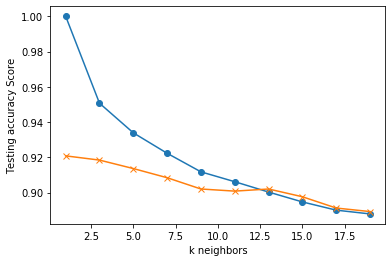

In [25]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [26]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.902
